# 6.2 Exploring Relationships

## Contents

### 01. Importing Libraries

### 02. Importing Cleaned Data

### 03. Discarding Unecessary Columns 

### 04. Exploring Relationships

#### **&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a) Correlations**

#### **&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- matplotlib heatmap**

#### **&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- seaborn heatmap**

#### **&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b) Scatter Plot**

#### **&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c) Pair Plots**

#### **&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d) Categorical Plot**

#### 01. Importing Libraries

In [167]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [168]:
matplotlib.__version__

'3.10.0'

In [169]:
# This option ensures the charts I create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

#### 02. Importing Cleaned Data

In [170]:
df = pd.read_pickle('/Users/yaseminmustafa/Desktop/CareerFoundry/Exercise 6/Open_Source_Data/cleaned_bike_data.pkl')

#### 03. Discarding Unecessary Columns 

In [171]:
# Drop the unnecessary columns
columns_to_drop = [
    'trip_id', 'bike_id', 'start_time', 'end_time',
    'start_station_id', 'end_station_id', 'birth_year_missing', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude','end_station_longitude' 
]

df_cleaned = df.drop(columns=columns_to_drop)

# Create 'age' from 'birth_year'
import datetime
current_year = datetime.datetime.now().year
df_cleaned['age'] = current_year - df_cleaned['birth_year']

# Drop birth_year & use 'age' instead
df_cleaned = df_cleaned.drop(columns=['birth_year'])

# Preview cleaned dataset
df_cleaned.head()

,weekday,start_hour,start_station_name,end_station_name,trip_duration,subscriber,gender,age
0,Mon,18.0,W 38 St & 8 Ave,W 20 St & 7 Ave,993.0,Subscriber,female,57.0
1,Thu,18.0,Lispenard St & Broadway,St Marks Pl & 2 Ave,581.0,Subscriber,male,42.0
2,Wed,19.0,9 Ave & W 45 St,W 56 St & 10 Ave,361.0,Subscriber,male,36.0
3,Sat,11.0,E 33 St & 1 Ave,E 52 St & 2 Ave,561.0,Subscriber,female,37.0
5,Fri,22.0,Lafayette St & E 8 St,E 7 St & Avenue A,427.0,Subscriber,female,39.0


#### 04. Exploting Relationships

##### **a) Correlations**

##### - **matplotlib heatmap**

In [172]:
# Create a correlation matrix using pandas
# Select only numeric columns
numeric_df = df_cleaned.select_dtypes(include='number')

# Create the correlation matrix
corr_matrix = numeric_df.corr()

# Display the matrix
corr_matrix

,start_hour,trip_duration,age
start_hour,1.000000,0.049034,-0.062897
trip_duration,0.049034,1.000000,0.012135
age,-0.062897,0.012135,1.000000


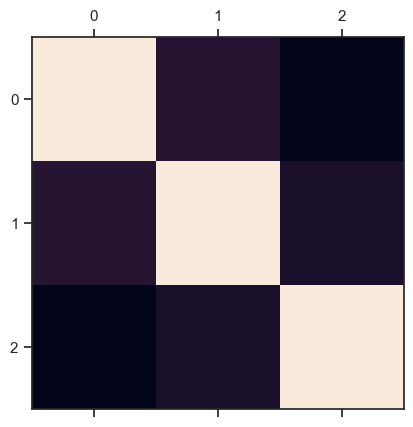

In [173]:
# Create a correlation heatmap using matplotlib

plt.matshow(corr_matrix)
plt.show()

In [174]:
# Save figure
plt.matshow(corr_matrix)
plt.savefig("out.png") 

# This will save the image in the working directory. 

In [175]:
# Check current directory
cwd = os.getcwd()
cwd

'/Users/yaseminmustafa/Desktop/CareerFoundry/Exercise 6'

##### - **seaborn heatmap**

In [176]:
df_cleaned.columns

Index(['weekday', 'start_hour', 'start_station_name', 'end_station_name',
       'trip_duration', 'subscriber', 'gender', 'age'],
      dtype='object')

In [177]:
# Create a subset (unecessary columns have already been excluded)

sub = df_cleaned[['weekday', 'start_hour', 'start_station_name', 'end_station_name',
       'trip_duration', 'subscriber', 'gender', 'age']]

In [178]:
sub

,weekday,start_hour,start_station_name,end_station_name,trip_duration,subscriber,gender,age
0,Mon,18.0,W 38 St & 8 Ave,W 20 St & 7 Ave,993.0,Subscriber,female,57.0
1,Thu,18.0,Lispenard St & Broadway,St Marks Pl & 2 Ave,581.0,Subscriber,male,42.0
2,Wed,19.0,9 Ave & W 45 St,W 56 St & 10 Ave,361.0,Subscriber,male,36.0
3,Sat,11.0,E 33 St & 1 Ave,E 52 St & 2 Ave,561.0,Subscriber,female,37.0
5,Fri,22.0,Lafayette St & E 8 St,E 7 St & Avenue A,427.0,Subscriber,female,39.0
...,...,...,...,...,...,...,...,...
49993,Wed,19.0,Greenwich Ave & 8 Ave,Greenwich St & N Moore St,1084.0,Non-Subscriber,NaN,47.0
49994,Sun,16.0,Spruce St & Nassau St,E 2 St & Avenue B,1541.0,Subscriber,male,50.0
49996,Sat,17.0,Johnson St & Gold St,Cleveland Pl & Spring St,1191.0,Subscriber,female,55.0
49997,Sat,18.0,Broadway & E 22 St,W 43 St & 6 Ave,1050.0,Subscriber,female,64.0


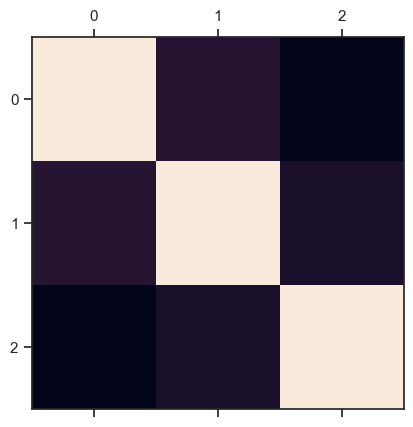

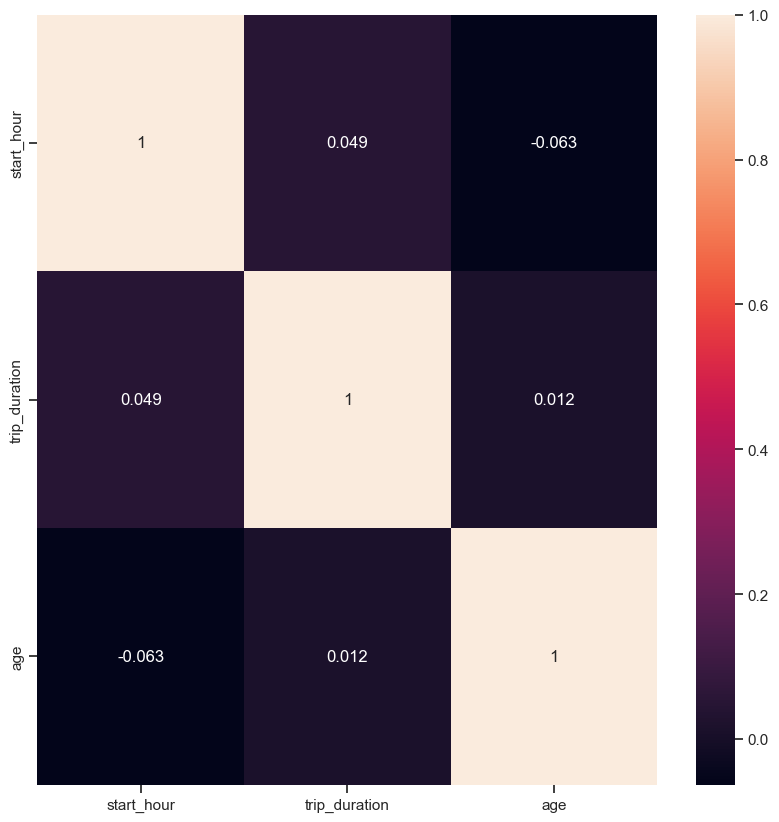

In [179]:
# Create a subplot with matplotlib
# First, check which columns contain non-numeric data

# Exclude non-numeric columns
numeric_columns = sub.select_dtypes(include=['number']).columns
sub_numeric = sub[numeric_columns]

# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap using only numeric columns
corr = sns.heatmap(sub_numeric.corr(), annot=True, ax=ax)
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
plt.show()

##### **In this coloured heatmap, start_hour and age has a slight negative correlation, suggesting that older users tend to ride slightly earlier in the day than younger users — though the relationship is very weak and likely not meaningful on its own. start_hour and trip_duration has a slight positive correlation, suggetsing there’s a very weak tendency for trips to last a bit longer during later hours, but again this is too small to infer much. trip_duration and age is near zero, suggetsing there is virtually no relationship between a rider's age and the length of their trip. Riders of all ages tend to take trips of similar duration.**

##### **b) Scatter Plot**

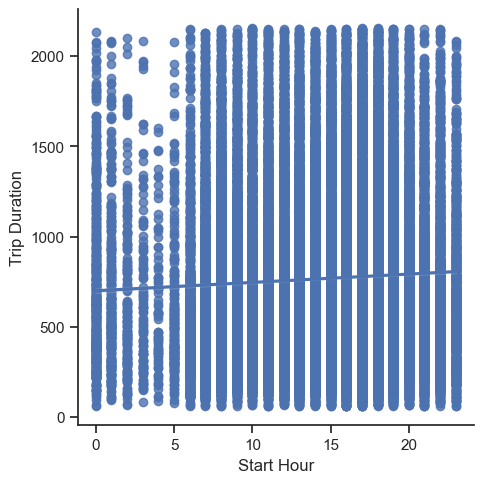

In [180]:
# Create a scatterplot for the "start_hour" and "trip_duration" columns in seaborn
g = sns.lmplot(x='start_hour', y='trip_duration', data=df_cleaned)

# Rename the axes
g.set_axis_labels("Start Hour", "Trip Duration")

plt.show()

##### **This scatterplot visualises the relationship between start-hour and trip_duration. The correlation coefficient (r ≈ 0.049) indicates a very weak positive relationship, meaning that there is no meaningful linear trend between the time of day a trip starts and how long the trip lasts. The points appear widely scattered from the treadline, further supporting the lack of strong association. This suggests that trip duration is not strongly influenced by the time of day, at least not in a linear way.**

##### **c) Pair Plots**

In [181]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['start_hour', 'trip_duration', 'age']]

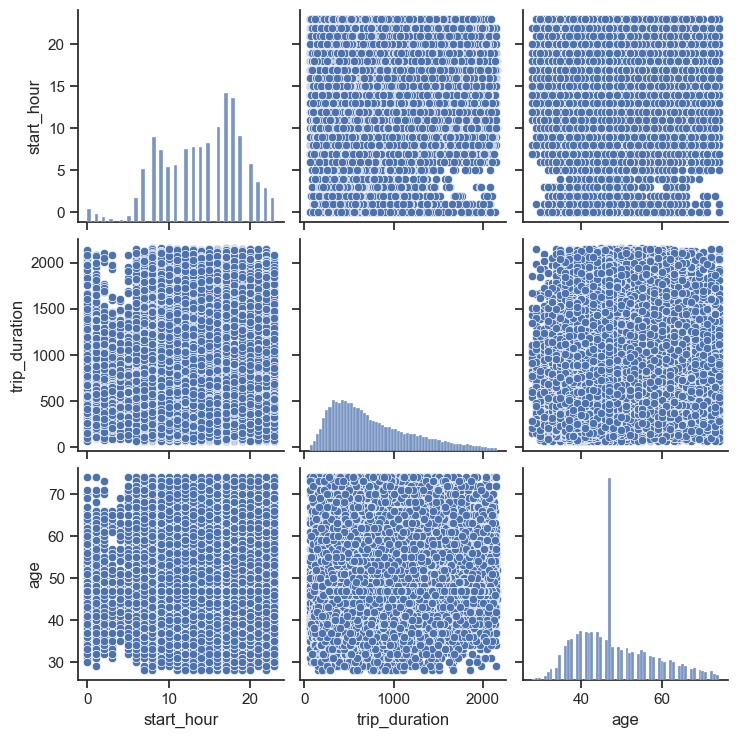

In [182]:
# Create a pair plot 

g = sns.pairplot(sub_2)
plt.show()

##### **The pair plots reveal that the variables in this dataset do not exhibit strong linear relationships with one another. The scatterplots appear mostly dispersed with no clear trend or clustering, making it difficult to identify reliable predictors for further analysis based solely on correlation.**

##### **d) Categorical Plot**

##### Creating a categorical variable that splits the "age" column into categories

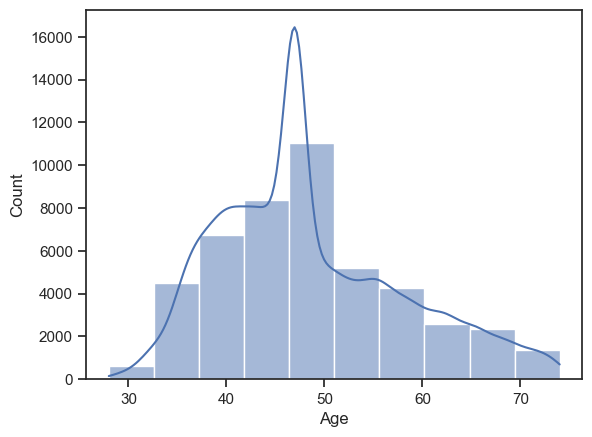

In [183]:
# Use a histogram to visualise the distribution of the variables. 
# This way, I can determine sensible categories for the age ranges. 
# I don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_cleaned['age'], bins = 10, kde = True)

# Rename x-axis
plt.xlabel("Age")

plt.show()

In [184]:
df_cleaned.loc[df_cleaned['age'] < 30, 'Age Group'] = 'Young Adult'

In [185]:
df_cleaned.loc[(df_cleaned['age'] >= 30) & (df_cleaned['age'] < 60), 'Age Group'] = 'Middle Aged'

In [186]:
df_cleaned.loc[df_cleaned['age'] >= 60, 'Age Group'] = 'Senior'

In [187]:
df_cleaned['Age Group'].value_counts(dropna = False)

Age Group
Middle Aged    39948
Senior          7023
Young Adult       92
Name: count, dtype: int64

In [188]:
df_cleaned.columns

Index(['weekday', 'start_hour', 'start_station_name', 'end_station_name',
       'trip_duration', 'subscriber', 'gender', 'age', 'Age Group'],
      dtype='object')

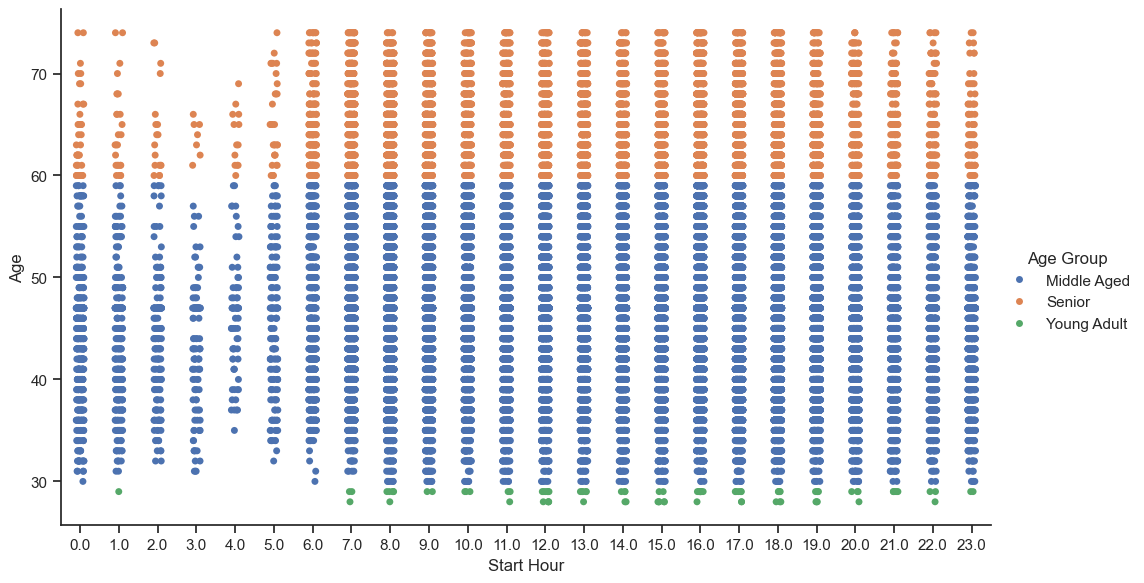

In [189]:
# Create a categorical plot in seaborn using the age categories created above
sns.set(style="ticks")

# Increase figure size and adjust aspect ratio
g = sns.catplot(
    x="start_hour",
    y="age",
    hue="Age Group",
    data=df_cleaned,
    height=6,      # controls height of the plot
    aspect=1.7     # controls width-to-height ratio
)

# Rename axes
g.set_axis_labels("Start Hour", "Age")

plt.show()

##### **From this catplot, we can observe clear differences in bike usage patterns across age groups throughout the day. Young adults tend to use Citi Bikes primarily between 7 AM and 10 PM, suggesting a preference for daytime and early evening travel, likely for commuting or social activities. Middle-aged users show more consistent usage throughout the entire day, including late-night and early-morning hours, though there's a noticeable dip between 2 AM and 5 AM. This could indicate more varied routines or less dependence on public transport alternatives. Senior users, while generally less active during very early hours, demonstrate a concentrated usage pattern between 6 AM and 11 PM, with very few rides occurring between 2 AM and 4 AM. Overall, these patterns suggest that age group may be a meaningful predictor of the time of day bikes are used, which could help inform strategies for bike availability and rebalancing across time slots.**